<a href="https://colab.research.google.com/github/sanketchavan5595/EDA-on-Google-Playstore-apps/blob/main/Exploratory_Data_Analysis_on_Google_Playstore_apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Google Playstore Apps**

* In this analysis, we will be exploring various apps available on Google Playstore
* We will be using the pandas, numpy, matplotlib and seaborn libraries. 
* Cleaning and Preparation of data is done. This also involves variable indenfication, changing the dtypes of the values etc. 
* At the end, we will asking and answering few questions to gain more insights.

You can access the dataset with the following url

url = 'https://raw.githubusercontent.com/sanketchavan5595/EDA-on-Google-Playstore-apps/main/googleplaystore.csv'

In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [82]:
url = 'https://raw.githubusercontent.com/sanketchavan5595/EDA-on-Google-Playstore-apps/main/googleplaystore.csv'
df = pd.read_csv(url)
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [83]:
# getting the dtype and number of null values in the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [84]:
# getting the number of null values in the data 
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [85]:
# we will drop the null values 
df.dropna(inplace = True)

In [86]:
# dropping the duplicates 
df.drop_duplicates(subset=['App'], inplace = True)

In [87]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Exploratory Analysis and Visualization

### Now we will do variable indentification

* Categorical variables
    * Category 
    * Type
    * Content Rating
    * Genres
    * Last Updated


* Numerical variables
    * Rating
    * Reviews
    * Installs 
    * Price 

### let's take a look at Categorical variables 

#### Category

In [88]:
df.Category = df.Category.apply(lambda x: x.lower())
df.Category.value_counts()

family                 1607
game                    912
tools                   717
finance                 302
lifestyle               301
productivity            301
personalization         296
medical                 290
photography             263
business                263
sports                  260
communication           256
health_and_fitness      244
news_and_magazines      204
social                  203
travel_and_local        187
shopping                180
books_and_reference     169
video_players           148
dating                  134
maps_and_navigation     118
education               118
entertainment           102
food_and_drink           94
auto_and_vehicles        73
weather                  72
libraries_and_demo       63
house_and_home           62
art_and_design           60
comics                   54
parenting                50
events                   45
beauty                   42
Name: Category, dtype: int64

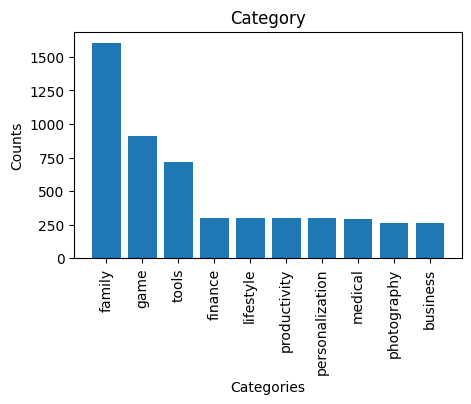

In [89]:
# top 10 categories
cat = df.Category.value_counts()[:10].to_dict().keys()
counts = df.Category.value_counts()[:10].to_dict().values()

plt.figure(figsize=(5,3), dpi=100)
plt.bar(cat, counts)
plt.title("Category")
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.xticks(rotation = 90);

The majority of the apps come into these three categories 
* Family 
* Game
* Tools




---





#### Type

In [90]:
df.Type.value_counts()

Free    7588
Paid     602
Name: Type, dtype: int64

Free apps are more than the Paid apps

#### Content Rating

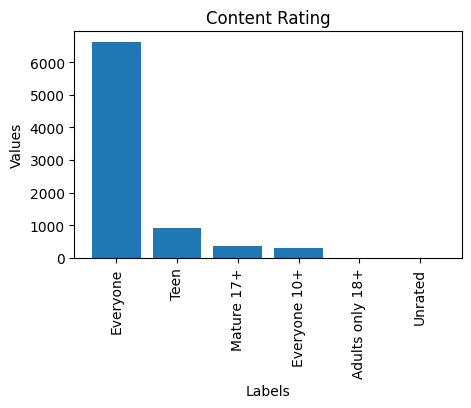

In [91]:
df['Content Rating'].value_counts().to_dict()
x = df['Content Rating'].value_counts().to_dict().keys()
y = df['Content Rating'].value_counts().to_dict().values()

plt.figure(figsize=(5,3), dpi=100)
plt.title("Content Rating")
plt.bar(x, y)
plt.xlabel('Labels')
plt.ylabel('Values')
plt.xticks(rotation = 90);

'Everyone' category has most number of apps



---




#### Genres

In [92]:
df.Genres.value_counts()

Tools                          716
Entertainment                  471
Education                      429
Finance                        302
Productivity                   301
                              ... 
Music & Audio;Music & Video      1
Strategy;Creativity              1
Adventure;Brain Games            1
Art & Design;Pretend Play        1
Tools;Education                  1
Name: Genres, Length: 114, dtype: int64

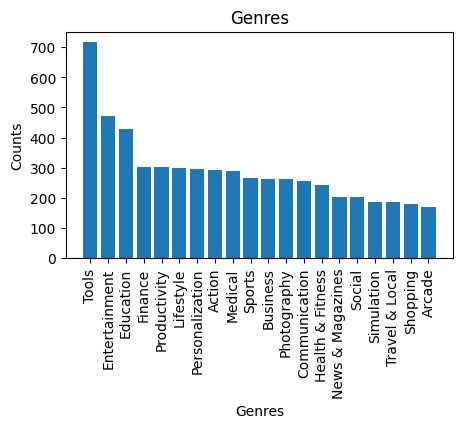

In [93]:
# Top 10 Genres
x = df['Genres'].value_counts()[:20].to_dict().keys()
y = df['Genres'].value_counts()[:20].to_dict().values()

plt.figure(figsize=(5,3), dpi=100)
plt.title("Genres")
plt.bar(x,y)
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.xticks(rotation = 90);

The dominant genres are:
* Tools
* Entertainment
* Education



---



#### Last Updated

In [94]:
year = []
l = df['Last Updated'].apply(lambda x: x.split(','))
for e in l:
    year.append(e[-1])
df['year_updated'] = year
df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018
1,Coloring book moana,art_and_design,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,art_and_design,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018
5,Paper flowers instructions,art_and_design,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,2017
6,Smoke Effect Photo Maker - Smoke Editor,art_and_design,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,2018
7,Infinite Painter,art_and_design,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,2018
8,Garden Coloring Book,art_and_design,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,2017
9,Kids Paint Free - Drawing Fun,art_and_design,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,2018


In [95]:
df.year_updated = pd.to_numeric(df.year_updated)

In [96]:
df.year_updated.value_counts()

2018    5446
2017    1425
2016     628
2015     379
2014     184
2013      91
2012      21
2011      15
2010       1
Name: year_updated, dtype: int64



---

---





# Let's take a look at the Numerical variables 
* Rating
* Reviews
* Installs 
* Price 

### Rating

In [97]:
df.Rating.value_counts()[:5]

4.3    897
4.4    894
4.5    847
4.2    809
4.6    683
4.1    620
4.0    512
4.7    442
3.9    359
3.8    286
5.0    271
Name: Rating, dtype: int64

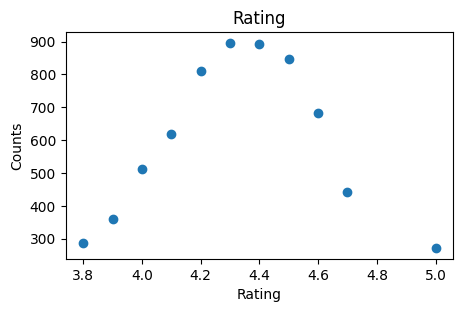

In [98]:
x = df.Rating.value_counts()[:5].to_dict().keys()
y = df.Rating.value_counts()[:5].to_dict().values()

plt.figure(figsize=(5,3), dpi=100)
plt.title("Rating")
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.scatter(x,y);

Most number of apps are rated 4.4



---



#### Reviews

In [99]:
df.Reviews = pd.to_numeric(df.Reviews)
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8190, dtype: int64

In [100]:
df[df['Reviews'] == df.Reviews.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated
2544,Facebook,social,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,2018


In [101]:
df[df['Reviews'] == df.Reviews.min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated
625,House party - live chat,dating,1.0,1,9.2M,10+,Free,0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up,2018
645,UK Girls Mobile Numbers,dating,3.0,1,5.5M,500+,Free,0,Mature 17+,Dating,"July 19, 2018",1.0,4.0.3 and up,2018
1038,Mindvalley U Tallinn 2018,events,5.0,1,21M,100+,Free,0,Everyone,Events,"July 3, 2018",1.0.5,4.4 and up,2018
2445,Labs on Demand,medical,5.0,1,22M,10+,Free,0,Everyone,Medical,"August 3, 2018",1.2,4.2 and up,2018
2459,Anatomy & Physiology Vocabulary Exam Review App,medical,5.0,1,4.6M,5+,Free,0,Everyone,Medical,"August 2, 2018",2.0,4.0 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9513,Ek Kahani Aisi Bhi Season 3 - The Horror Story,family,3.0,1,5.8M,100+,Free,0,Teen,Entertainment,"July 21, 2018",1.1,5.0 and up,2018
9659,FAST EO,events,5.0,1,Varies with device,10+,Free,0,Everyone,Events,"May 15, 2018",1.0.3,4.1 and up,2018
9810,ES Billing System (Offline App),productivity,5.0,1,4.2M,100+,Free,0,Everyone,Productivity,"May 17, 2018",1.0,4.1 and up,2018
10529,FK CLASSIC FOR YOU,business,5.0,1,3.5M,10+,Free,0,Everyone,Business,"February 20, 2018",1.1.0,4.0 and up,2018


Facebook has the highest number of reviews
while there are 67 apps with only one review



---



#### Installs

In [102]:
df.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 8190, dtype: object

Installs has the object data type. 

We need to convert that to int or float

In [103]:
df.Installs = df.Installs.apply(lambda x: x.replace('+', ''))
df.Installs = df.Installs.apply(lambda x: x.replace(',', ''))
df.Installs = pd.to_numeric(df.Installs)

In [104]:
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8190, dtype: int64

In [105]:
df[df['Installs']== df.Installs.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated
152,Google Play Books,books_and_reference,3.9,1433233,Varies with device,1000000000,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,2018
335,Messenger – Text and Video Chat for Free,communication,4.0,56642847,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,2018
336,WhatsApp Messenger,communication,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018
338,Google Chrome: Fast & Secure,communication,4.3,9642995,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,2018
340,Gmail,communication,4.3,4604324,Varies with device,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,2018
341,Hangouts,communication,4.0,3419249,Varies with device,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,2018
391,Skype - free IM & video calls,communication,4.1,10484169,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018
865,Google Play Games,entertainment,4.3,7165362,Varies with device,1000000000,Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,2018
1654,Subway Surfers,game,4.5,27722264,76M,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,2018
2544,Facebook,social,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,2018


There are 58 apps which have highest number of installs i.e. 1,000,000,000	



---



#### Price 

In [106]:
df.Price

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 8190, dtype: object

Converting the Price from object to float

In [107]:
df.Price = df.Price.apply(lambda x: x.replace('$', ''))
df.Price = pd.to_numeric(df.Price)

In [108]:
df.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 8190, dtype: float64

In [109]:
df[df['Price']== df.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated
4367,I'm Rich - Trump Edition,lifestyle,3.6,275,7.3M,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,2018


The app "I'm Rich - Trump Edition" fromt the catergory 'Lifestyle' is the most costly app priced at $400 



---

---





# Asking and Answering Questions

There are so many questions that can be asked. Here are few: 


* Top 10 apps with highest number of Reviews of the Type Free and Paid
*   out of paid apps, which app are most cheap and how many are there
* which category has the highest number of paid apps?
* which paid app has highest number of installs
* what are the average number of installs in categories
* Apps and their categories which have device dependent sizes
* Which genres have the highest rated apps
* which apps have the highest number of  ratings by Teens?





**Top 10 apps with highest number of Reviews of the Type Free and Paid**

In [110]:
df1 = df[df['Type']== 'Free']
df1.sort_values('Reviews', ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated
2544,Facebook,social,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,2018
336,WhatsApp Messenger,communication,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018
2545,Instagram,social,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,2018
335,Messenger – Text and Video Chat for Free,communication,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,2018
1670,Clash of Clans,game,4.6,44891723,98M,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,2018
4005,Clean Master- Space Cleaner & Antivirus,tools,4.7,42916526,Varies with device,500000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,2018
1654,Subway Surfers,game,4.5,27722264,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,2018
3665,YouTube,video_players,4.3,25655305,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,2018
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",tools,4.7,24900999,Varies with device,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device,2018
1660,Clash Royale,game,4.6,23133508,97M,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,2018


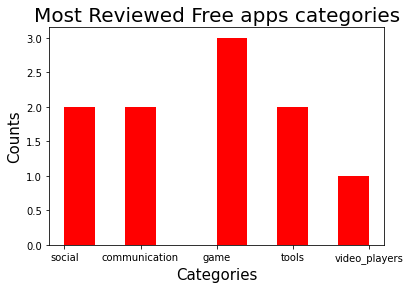

In [111]:
plt.title("Most Reviewed Free apps categories", fontsize=20)
plt.xlabel("Categories", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.hist(df1.sort_values('Reviews', ascending = False).head(10).Category, color = 'red');

In [112]:
df2 = df[df['Type']== 'Paid']
df2.sort_values('Reviews', ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated
2241,Minecraft,family,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,2018
4034,Hitman Sniper,game,4.6,408292,29M,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,2018
7417,Grand Theft Auto: San Andreas,game,4.4,348962,26M,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,2015
8860,Bloons TD 5,family,4.6,190086,94M,1000000,Paid,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,2018
9678,Where's My Water?,family,4.7,188740,69M,1000000,Paid,1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,2018
2242,Card Wars - Adventure Time,family,4.3,129603,23M,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"February 11, 2016",1.11.0,2.3.3 and up,2016
5490,True Skate,sports,4.4,129409,73M,1000000,Paid,1.99,Everyone,Sports,"August 4, 2018",1.5.1,4.0.3 and up,2018
5631,Five Nights at Freddy's,game,4.6,100805,50M,1000000,Paid,2.99,Teen,Action,"December 2, 2014",1.85,2.3 and up,2014
3403,Beautiful Widgets Pro,personalization,4.2,97890,14M,1000000,Paid,2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,2016
8804,DraStic DS Emulator,game,4.6,87766,12M,1000000,Paid,4.99,Everyone,Action,"July 19, 2016",r2.5.0.3a,2.3 and up,2016


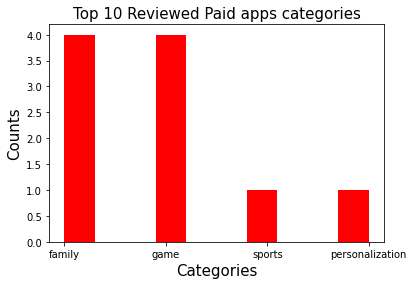

In [113]:
plt.title("Top 10 Reviewed Paid apps categories", fontsize=15)
plt.xlabel("Categories", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.hist(df2.sort_values('Reviews', ascending = False).head(10).Category, color = 'red');



---



### **Out of paid apps, which app are most cheap and how many are there??**

In [114]:
df2.sort_values('Price', ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated
4367,I'm Rich - Trump Edition,lifestyle,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,2018
5364,I am rich (Most expensive app),finance,4.1,129,2.7M,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up,2017
4197,most expensive app (H),family,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,2018
5358,I am Rich!,finance,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,2017
5369,I am Rich,finance,4.3,180,3.8M,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,Hitman GO,family,4.6,84114,23M,500000,Paid,0.99,Everyone 10+,Puzzle,"July 5, 2018",1.13.108869,2.3.3 and up,2018
6985,Trinomial Factoring Wizard,tools,4.0,22,82k,1000,Paid,0.99,Everyone,Tools,"October 10, 2014",2.4,2.3 and up,2014
9170,Stickman Legends: Shadow Wars,game,4.4,38419,100M,1000000,Paid,0.99,Everyone 10+,Action,"August 3, 2018",2.3.24,4.1 and up,2018
9165,League of Stickman 2018- Ninja Arena PVP(Dream...,game,4.4,32496,99M,1000000,Paid,0.99,Teen,Action,"July 3, 2018",5.3.3,2.3 and up,2018


In [115]:
df2.Price.min()
df2[df2['Price']== df2.Price.min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated
2171,All-in-One Mahjong 3,family,4.4,38,16M,100,Paid,0.99,Everyone,Board;Brain Games,"June 14, 2018",20180609,4.0 and up,2018
2172,World Racers family board game,family,4.8,4,42M,100,Paid,0.99,Everyone,Board;Pretend Play,"September 3, 2015",1.1,5.1 and up,2015
2173,SweetLand — Family Board Game,family,4.2,38,47M,1000,Paid,0.99,Everyone,Casual;Pretend Play,"November 14, 2014",1.2,2.3.3 and up,2014
2244,iBP Blood Pressure,medical,4.4,578,704k,10000,Paid,0.99,Everyone,Medical,"November 30, 2014",7.0.1,2.2 and up,2014
2275,Blood Pressure Companion,medical,4.2,178,4.8M,1000,Paid,0.99,Everyone,Medical,"July 22, 2018",4.1.5 (Steglitz),4.1 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10586,FL Racing Manager 2015 Pro,sports,4.4,656,22M,5000,Paid,0.99,Everyone,Sports,"March 12, 2016",0.858,3.0 and up,2016
10675,Circle Colors Pack-FN Theme,personalization,4.2,6,89k,50,Paid,0.99,Everyone,Personalization,"August 9, 2013",1.0,2.2 and up,2013
10682,Fruit Ninja Classic,game,4.3,85468,36M,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up,2018
10690,FO Bixby,personalization,5.0,5,861k,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up,2018


**There are 103 apps which are priced at $0.99 and are the cheapest among the paid apps**



---



### **Which category has the highest number of paid apps?**

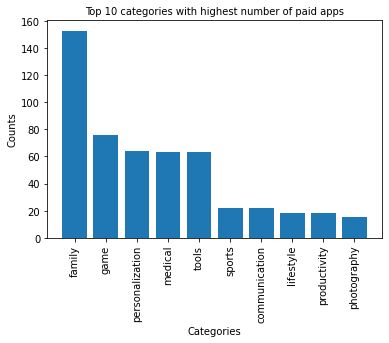

In [116]:
df3 = df[df['Type'] == 'Paid']

cat = df3.Category.value_counts()[:10].to_dict().keys()
counts = df3.Category.value_counts()[:10].to_dict().values()

plt.title("Top 10 categories with highest number of paid apps", fontsize = 10)
plt.bar(cat, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation = 90);

**The Category 'family' has the highest number of paid apps**



---



### **Which paid app has highest number of installs?**

In [117]:
df3.sort_values('Installs', ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated
2241,Minecraft,family,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,2018
4034,Hitman Sniper,game,4.6,408292,29M,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,2018
9165,League of Stickman 2018- Ninja Arena PVP(Dream...,game,4.4,32496,99M,1000000,Paid,0.99,Teen,Action,"July 3, 2018",5.3.3,2.3 and up,2018
2242,Card Wars - Adventure Time,family,4.3,129603,23M,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"February 11, 2016",1.11.0,2.3.3 and up,2016
9151,Lost Journey (Dreamsky),game,4.5,32344,29M,1000000,Paid,0.99,Everyone,Adventure,"October 21, 2016",1.3.12,3.0 and up,2016
3405,HD Widgets,personalization,4.3,58617,26M,1000000,Paid,0.99,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up,2016
3403,Beautiful Widgets Pro,personalization,4.2,97890,14M,1000000,Paid,2.49,Everyone,Personalization,"August 24, 2016",5.7.8,2.3 and up,2016
5631,Five Nights at Freddy's,game,4.6,100805,50M,1000000,Paid,2.99,Teen,Action,"December 2, 2014",1.85,2.3 and up,2014
6675,Infinity Dungeon VIP,family,4.3,21804,44M,1000000,Paid,0.99,Everyone 10+,Role Playing,"July 3, 2018",2.6.6,2.3 and up,2018
5578,Sleep as Android Unlock,lifestyle,4.5,23966,872k,1000000,Paid,5.99,Everyone,Lifestyle,"June 27, 2018",20180608,4.0 and up,2018


**Among the paid apps 'Minecraft' has the highest number of installs**



---



### **What are the average number of installs in categories?**

In [118]:
df_cat = df.groupby('Category')['Installs'].mean()
df_cat

Category
art_and_design         1.903802e+06
auto_and_vehicles      7.278055e+05
beauty                 6.408619e+05
books_and_reference    9.856755e+06
business               2.650259e+06
comics                 8.320574e+05
communication          4.311813e+07
dating                 1.051585e+06
education              2.990271e+06
entertainment          2.072216e+07
events                 3.544313e+05
family                 2.755090e+06
finance                1.507657e+06
food_and_drink         2.251891e+06
game                   1.521794e+07
health_and_fitness     4.688550e+06
house_and_home         1.565839e+06
libraries_and_demo     8.108413e+05
lifestyle              1.673559e+06
maps_and_navigation    4.264979e+06
medical                1.315610e+05
news_and_magazines     1.161329e+07
parenting              6.223222e+05
personalization        5.176831e+06
photography            1.767735e+07
productivity           1.924608e+07
shopping               7.779620e+06
social             

**Following Categories have highest average number of installs**
   * Communication
   * Entertainment
   * Game
   * News and magazines
   * Productivity
   * Tools
   * Video players
   * Travels and local




---



### **Apps and their categories which have device dependent sizes**

In [119]:
df_size = df[df['Size'] == 'Varies with device']
df_size

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_updated
37,Floor Plan Creator,art_and_design,4.1,36639,Varies with device,5000000,Free,0.0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,2018
42,Textgram - write on photos,art_and_design,4.4,295221,Varies with device,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,2018
52,Used Cars and Trucks for Sale,auto_and_vehicles,4.6,17057,Varies with device,1000000,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,2018
67,Ulysse Speedometer,auto_and_vehicles,4.3,40211,Varies with device,5000000,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,2018
68,REPUVE,auto_and_vehicles,3.9,356,Varies with device,100000,Free,0.0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,weather,4.4,3471,Varies with device,100000,Free,0.0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device,2018
10725,Posta App,maps_and_navigation,3.6,8,Varies with device,1000,Free,0.0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up,2017
10765,Chat For Strangers - Video Chat,social,3.4,622,Varies with device,100000,Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,2018
10826,Frim: get new friends on local chat rooms,social,4.0,88486,Varies with device,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,2018


<BarContainer object of 10 artists>

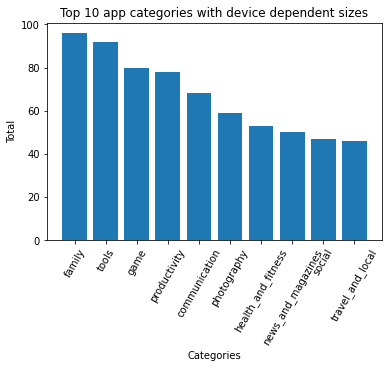

In [120]:
cat = df_size.Category.value_counts()[:10].to_dict().keys()
count = df_size.Category.value_counts()[:10].to_dict().values()

plt.title('Top 10 app categories with device dependent sizes')
plt.xlabel('Categories')
plt.ylabel('Total')
plt.xticks(rotation = 60)
plt.bar(cat, count)



---



### **Which genres have the highest rated apps?**

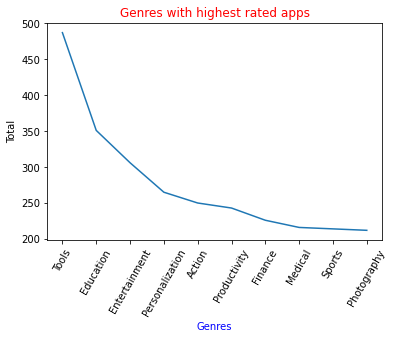

In [121]:
df_rated = df[df['Rating'] >= 4.0]
gen = df_rated.Genres.value_counts()[:10].to_dict().keys()
count = df_rated.Genres.value_counts()[:10].to_dict().values()

plt.title('Genres with highest rated apps', color = 'red')
plt.xlabel('Genres', color= 'blue')
plt.ylabel('Total')
plt.xticks(rotation = 60)
sns.lineplot(x = gen,
             y = count);



---



### **Which apps have the highest number of  ratings by Teens?**

In [122]:
df_teen = df[df['Content Rating']== 'Teen'][['App','Installs', 'Rating', 'Reviews']]
df_teen.sort_values('Rating', ascending = False)[:10]

,App,Installs,Rating,Reviews
10820,Fr. Daoud Lamei,1000,5.0,22
9194,UP EB Bill Payment & Details,50,5.0,3
633,Spine- The dating app,500,5.0,5
5828,A-Y Collection,100,5.0,2
5996,Railroad Radio Vancouver BC,100,5.0,4
10407,Jigsaw Volvo FH 16 Trucks,1000,5.0,5
6055,Movement BE,100,5.0,20
9512,Hum Ek Hain 2.02,10,5.0,2
9455,EJ messenger,10,5.0,1
9282,EF Events,100,5.0,7


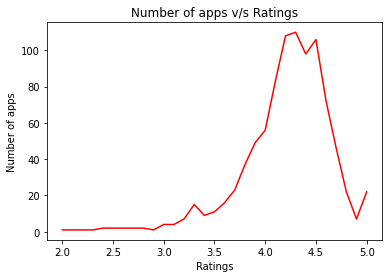

In [123]:
ratings = df_teen.Rating.value_counts().to_dict().keys()
count = df_teen.Rating.value_counts().to_dict().values()

plt.title("Number of apps v/s Ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of apps")
sns.lineplot(x = ratings,
             y = count, color = 'red');



---

---





## References
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
* https://numpy.org/doc/
* https://matplotlib.org/3.3.3/contents.html
* https://seaborn.pydata.org/




---



### If you have any views, feel free to mention them


# *THANK* *YOU*

---


